# Exercise: Python lists and iterations

In this notebook we explore the use of lists and iterations. 

## Speed comparisons

We start, however, with a word of caution. The use of lists and for-loops can be painfully slow. Here we show some examples. We use the *magic command* `%timeit` to perform the timing measurement. It runs the command(s) multiple times and presents the mean execution time and its standard deviation. This provides a more reliable metric than the output from a single time measurement. 

While `%timeit` measures the command(s) on the same line, the double `%%` implies that the whole cell will be measured.

### Creating a list, range, numpy array

In [1]:
n = 1_000 # Note that we can use the '_' in integer representations

Creating a list via iteration is notoriously slow.

In [2]:
%%timeit
x_list = []
for i in range(n):
    x_list.append(i)

22.8 μs ± 54.8 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


We must be careful that the variable `x_list` is only used inside the `timeit` call and is not retained.

In [3]:
x_list

NameError: name 'x_list' is not defined

We create a new copy without timing.

In [4]:
x_list = []
for i in range(n):
    x_list.append(i)

The creation of a numpy array is much faster.

In [5]:
import numpy as np

In [6]:
%timeit np.arange(n)    # Timing only of this line
x_arange = np.arange(n) # Repeating the command for later use of the variable

577 ns ± 7.19 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


Note that the built-in function `range` is rather fast. This is because it is an `iterator` rather than a list or array.

In [7]:
%timeit range(n)
x_range = range(n)

52.1 ns ± 0.987 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [8]:
type(x_list)

list

In [9]:
type(x_range)

range

In [10]:
type(x_arange)

numpy.ndarray

### Iteration versus array operation

Let's iterate over the list and sum the squares of the elements.

In [11]:
%%timeit
sum_of_squares = 0
for x in x_list:
    sum_of_squares += x**2

48.1 μs ± 357 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Using a `range` rather than a `list` does not improve the speed.

In [12]:
%%timeit
sum_of_squares = 0
for x in x_range:
    sum_of_squares += x**2

57.1 μs ± 2.89 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Whereas the vectorized evaluation of an `np.array` operation is superior.

In [13]:
%%timeit
sum_of_squares = np.sum(x_arange**2)

2.75 μs ± 15.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


As will be shown in the following, lists are still very useful objects in python, and iteration can be used for many tasks. 

## Iterating through a list of parameters to draw multiple lines on a plot

Suppose we have a function of $x$ that also depends on a parameter (call it $r$).  We want to plot the function vs. $x$ for multiple values of $r$, either on the same plot or on separate plots.  We can do this with a lot of cutting-and-pasting, but how can we do it based on a list of $r$ values, which we can easily modify?

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot formatting

In [21]:
def sine_map(r, x):
    """Sine map function: f_r(x) = r sin(pi x)
    """
    return r * np.sin(np.pi * x) 

Suppose the $r$ values initially of interest are 0.3, 0.5, 0.8, and 0.9.  First the multiple copy approach:

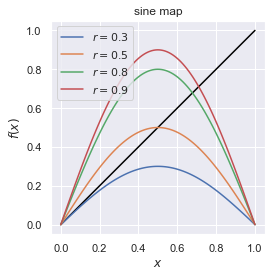

In [22]:
x_pts = np.linspace(0,1, num=101, endpoint=True)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

ax.plot(x_pts, x_pts, color='black')  # black y=x line

ax.plot(x_pts, sine_map(0.3, x_pts), label='$r = 0.3$')
ax.plot(x_pts, sine_map(0.5, x_pts), label='$r = 0.5$')
ax.plot(x_pts, sine_map(0.8, x_pts), label='$r = 0.8$')
ax.plot(x_pts, sine_map(0.9, x_pts), label='$r = 0.9$')

ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.set_title('sine map')

fig.tight_layout()


This certainly works, but making changes is awkward and prone to error because we have to find where to change (or add another) $r$ but we might not remember to change it correctly everywhere.

With minor changes we have a much better implementation (try modifying the list of $r$ values):

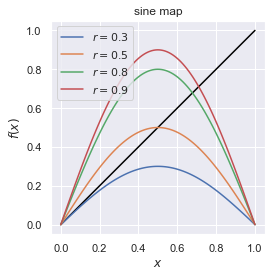

In [23]:
r_list = [0.3, 0.5, 0.8, 0.9]    # this could also be a numpy array

x_pts = np.linspace(0,1, num=101, endpoint=True)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect(1)

ax.plot(x_pts, x_pts, color='black')  # black y=x line

# Step through the list.  r is a dummy variable.
#  Note the use of an f-string and LaTeX by putting rf in front of the label.
for r in r_list:
    ax.plot(x_pts, sine_map(r, x_pts), label=rf'$r = {r:.1f}$')

ax.legend()
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.set_title('sine map')

fig.tight_layout()


Now suppose we want each the different $r$ values to be plotted on separate graphs?  We could make multiple  copies of the single plot.  Instead, lets make a function to do any single plot and call it for each $r$ in the list.

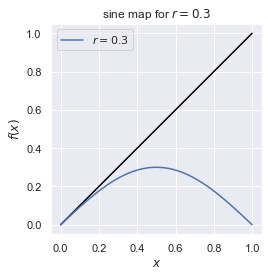

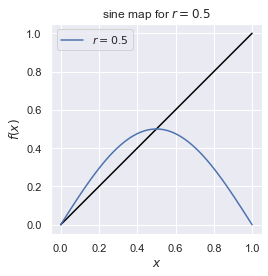

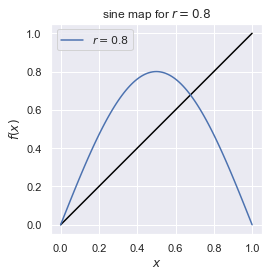

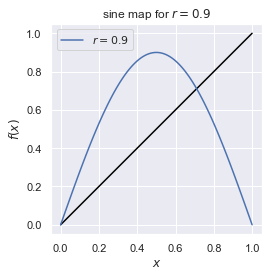

In [24]:
r_list = [0.3, 0.5, 0.8, 0.9]    # this could also be a numpy array

def plot_sine_map(r):
    x_pts = np.linspace(0,1, num=101, endpoint=True)

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.set_aspect(1)

    ax.plot(x_pts, x_pts, color='black')  # black y=x line

#  Note the use of an f-string and LaTeX by putting rf in front of the label.
    ax.plot(x_pts, sine_map(r, x_pts), label=rf'$r = {r:.1f}$')

    ax.legend()
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$f(x)$')
    ax.set_title(rf'sine map for $r = {r:.1f}$')
    
    fig.tight_layout()

    
# Step through the list.  r is a dummy variable.
for r in r_list:
    plot_sine_map(r)


What if instead of distinct plots we wanted subplots of the same figure?  Then create the figure and subplot axes outside of the function and have the function return the modified axis object.

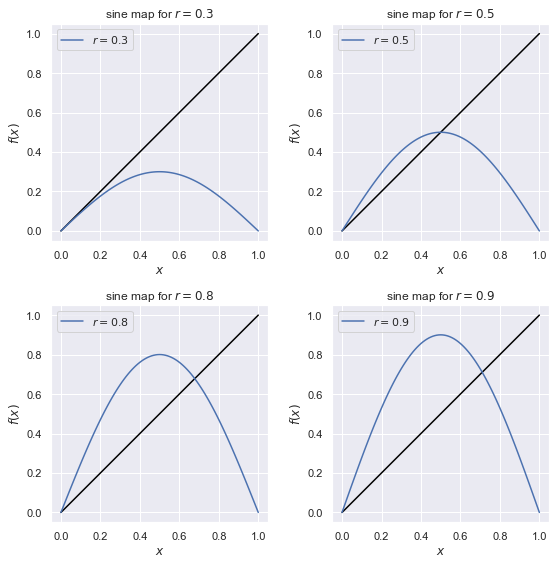

In [25]:
r_list = [0.3, 0.5, 0.8, 0.9]    # this could also be a numpy array

def plot_sine_map(r, ax_passed):
    x_pts = np.linspace(0,1, num=101, endpoint=True)

    ax_passed.set_aspect(1)

    ax_passed.plot(x_pts, x_pts, color='black')  # black y=x line

#  Note the use of an f-string and LaTeX by putting rf in front of the label.
    ax_passed.plot(x_pts, sine_map(r, x_pts), label=rf'$r = {r:.1f}$')

    ax_passed.legend()
    ax_passed.set_xlabel(r'$x$')
    ax_passed.set_ylabel(r'$f(x)$')
    ax_passed.set_title(rf'sine map for $r = {r:.1f}$')
    
    return ax_passed

fig = plt.figure(figsize=(8, 8))
  
# Step through the list.  r is a dummy variable.
rows = 2
cols = 2
for index, r in enumerate(r_list):
    ax = fig.add_subplot(rows, cols, index+1)
    ax = plot_sine_map(r, ax)

fig.tight_layout()
    

## Aside: List comprehensions 

In the plotting examples we used for loops to iterate through parameters or plots because it is familiar to anyone who has done programming.  In Python, however, it is often preferred to use a different construction called a list comprehension.  Here is a quick comparison of using for loop and using a list comprehension, followed by some representative further examples of list comprehensions. You can find much more information and other examples in the online Python documentation and other sources. (The examples here are from [https://hackernoon.com/list-comprehension-in-python-8895a785550b].)

In [1]:
numbers = [1, 2, 3, 4]
squares = []

for n in numbers:
  squares.append(n**2)

print(squares)  # Output: [1, 4, 9, 16]

[1, 4, 9, 16]


In [2]:
numbers = [1, 2, 3, 4]
squares = [n**2 for n in numbers]

print(squares)  # Output: [1, 4, 9, 16]

[1, 4, 9, 16]


Connecting back to the speed measurements that we made arlier, the construction of lists using list comprehension can be quite fast.

In [3]:
%timeit [n_i for n_i in range(n)]

392 ns ± 21.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


List comprehension is often used in *pythonic* one-liners! (not always easy to read)

In [30]:
# Find common numbers from two lists using list comprehension
list_a = [1, 2, 3, 4]
list_b = [2, 3, 4, 5]

common_num = [a for a in list_a for b in list_b if a == b]

print(common_num) # Output: [2, 3, 4]

[2, 3, 4]


In [31]:
# Return numbers from the list which are not equal as a tuple:
list_a = [1, 2, 3]
list_b = [2, 7]

different_num = [(a, b) for a in list_a for b in list_b if a != b]

print(different_num) # Output: [(1, 2), (1, 7), (2, 7), (3, 2), (3, 7)]

[(1, 2), (1, 7), (2, 7), (3, 2), (3, 7)]


In [32]:
# Iterate over strings
list_a = ["Hello", "World", "In", "Python"]

small_list_a = [str.lower() for str in list_a]

print(small_list_a) # Output: ['hello', 'world', 'in', 'python']

['hello', 'world', 'in', 'python']


In [33]:
# Making a list of lists
list_a = [1, 2, 3]

square_cube_list = [ [a**2, a**3] for a in list_a]

print(square_cube_list) # Output: [[1, 1], [4, 8], [9, 27]]

[[1, 1], [4, 8], [9, 27]]


In [34]:
# Using an if statement to make a list of unequal pairs of numbers
[(x, y) for x in [1,2,3] for y in [3,1,4] if x != y]
# Output: [(1, 3), (1, 4), (2, 3), (2, 1), (2, 4), (3, 1), (3, 4)]

[(1, 3), (1, 4), (2, 3), (2, 1), (2, 4), (3, 1), (3, 4)]